# ***IRIS FLOWER CLASSIFACTION***
Used the data Iris from kaggle


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Loading the Dataset

In [ ]:
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Target: species (0=setosa, 1=versicolor, 2=virginica)
feature_names = iris.feature_names
target_names = iris.target_names


### Visualization

In [ ]:
# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y
df['species_name'] = [target_names[i] for i in y]

print("Dataset Overview:")
print(f"Shape: {X.shape}")
print(f"Features: {feature_names}")
print(f"Target classes: {target_names}")
print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
print(df.describe())


Dataset Overview:
Shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  

Dataset Information:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean    

### Explortory Data Analysis

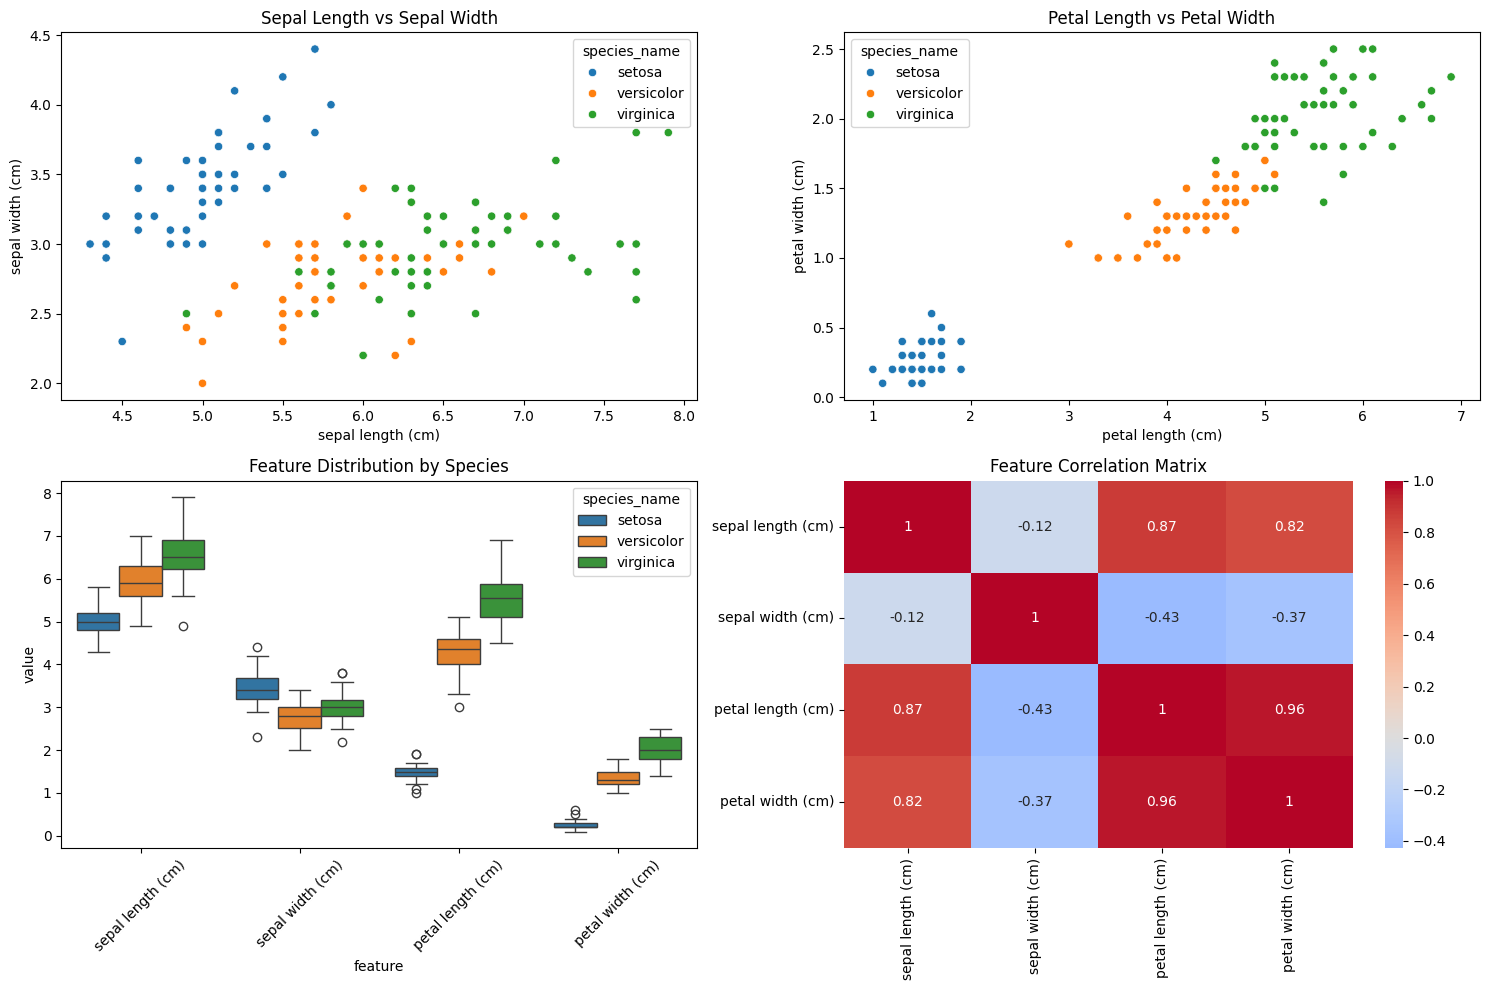

In [ ]:
plt.figure(figsize=(15, 10))

# Pairplot to visualize relationships between features
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species_name')
plt.title('Sepal Length vs Sepal Width')

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species_name')
plt.title('Petal Length vs Petal Width')

plt.subplot(2, 2, 3)

# Boxplot for feature distribution by species
df_melted = pd.melt(df, id_vars=['species_name'], value_vars=feature_names,
                   var_name='feature', value_name='value')
sns.boxplot(data=df_melted, x='feature', y='value', hue='species_name')
plt.xticks(rotation=45)
plt.title('Feature Distribution by Species')

plt.subplot(2, 2, 4)

# Correlation heatmap
correlation_matrix = df[feature_names].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')

plt.tight_layout()
plt.show()

In [ ]:
# Prepare data for modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(kernel='linear', random_state=42)
}


Training set size: 120
Test set size: 30


### Training and Evaluatation models

In [ ]:
# Train and evaluate models
results = {}

for name, model in models.items():
    # Train the model
    if name in ['Logistic Regression', 'Support Vector Machine']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))



Logistic Regression Results:
Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


K-Nearest Neighbors Results:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Decision Tree Results:
Accuracy: 0.9333

Classification Report:
              precision    reca

### Comaprsion of Models Performance

In [ ]:
# Compare model performance
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)
for name, accuracy in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: {accuracy:.4f}")


MODEL COMPARISON
K-Nearest Neighbors: 1.0000
Support Vector Machine: 1.0000
Logistic Regression: 0.9333
Decision Tree: 0.9333
Random Forest: 0.9000


### Best Model Selection

In [ ]:
# Best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with accuracy: {results[best_model_name]:.4f}")


Best Model: K-Nearest Neighbors with accuracy: 1.0000


### Confusion Matrixs for the Best model

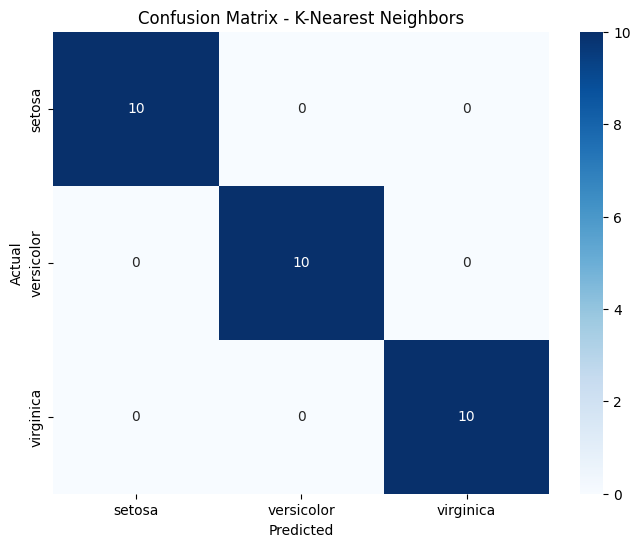

In [ ]:
# Confusion Matrix for the best model
if best_model_name in ['Logistic Regression', 'Support Vector Machine']:
    best_model.fit(X_train_scaled, y_train)
    y_pred_best = best_model.predict(X_test_scaled)
else:
    best_model.fit(X_train, y_train)
    y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Prediction

In [ ]:
# Make predictions on new data
def predict_iris_species(model, scaler, sepal_length, sepal_width, petal_length, petal_width, model_name):
    """
    Predict iris species based on measurements
    """
    # Create input array
    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

    # Scale if needed
    if model_name in ['Logistic Regression', 'Support Vector Machine']:
        input_data = scaler.transform(input_data)

    # Make prediction
    prediction = model.predict(input_data)
    probability = model.predict_proba(input_data) if hasattr(model, 'predict_proba') else None

    species = target_names[prediction[0]]

    print(f"\nPrediction for measurements:")
    print(f"Sepal Length: {sepal_length} cm, Sepal Width: {sepal_width} cm")
    print(f"Petal Length: {petal_length} cm, Petal Width: {petal_width} cm")
    print(f"Predicted Species: {species}")

    if probability is not None:
        print("Prediction Probabilities:")
        for i, prob in enumerate(probability[0]):
            print(f"  {target_names[i]}: {prob:.4f}")


In [ ]:
# Example prediction
print("\n" + "="*50)
print("EXAMPLE PREDICTION")
print("="*50)
predict_iris_species(best_model, scaler, 5.1, 3.5, 1.4, 0.2, best_model_name)


EXAMPLE PREDICTION

Prediction for measurements:
Sepal Length: 5.1 cm, Sepal Width: 3.5 cm
Petal Length: 1.4 cm, Petal Width: 0.2 cm
Predicted Species: setosa
Prediction Probabilities:
  setosa: 1.0000
  versicolor: 0.0000
  virginica: 0.0000
